# Keras チュートリアル

https://qiita.com/sasayabaku/items/64a01363bcd5c44feb0b

単純なmnist

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import utils

In [2]:
# kerasのMNISTデータの取得
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 配列の整形と，色の範囲を0-255 -> 0-1に変換
X_train = X_train.reshape(60000, 784) / 255
X_test = X_test.reshape(10000, 784) / 255

In [4]:
# 正解ラベルをダミー変数に変換
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [5]:
# ネットワークの定義
model = Sequential([
        Dense(512, input_shape=(784,)),
        Activation('sigmoid'),
        Dense(10),
        Activation('softmax')
        ])

In [6]:
# 損失関数，最適化アルゴリズムなどの設定 + モデルのコンパイルを行う
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [7]:
# 学習処理の実行 -> 変数histに進捗の情報が格納される
# validation_split=0.1 ---> 0.1(10%)の訓練データが交差検証に使われる
hist = model.fit(X_train, y_train, batch_size=200, verbose=1, epochs=3, validation_split=0.1)

Epoch 1/3
270/270 [==============================] - 1s 3ms/step - loss: 2.2217 - accuracy: 0.2655 - val_loss: 1.8869 - val_accuracy: 0.6683
Epoch 2/3
270/270 [==============================] - 1s 2ms/step - loss: 1.8141 - accuracy: 0.6659 - val_loss: 1.5264 - val_accuracy: 0.7650
Epoch 3/3
270/270 [==============================] - 1s 2ms/step - loss: 1.4834 - accuracy: 0.7522 - val_loss: 1.2469 - val_accuracy: 0.8172


In [8]:
# 予測
score = model.evaluate(X_test, y_test, verbose=1)
print("")
print('test accuracy : ', score[1])

313/313 [==============================] - 1s 1ms/step - loss: 1.2700 - accuracy: 0.7934

test accuracy :  0.79339998960495


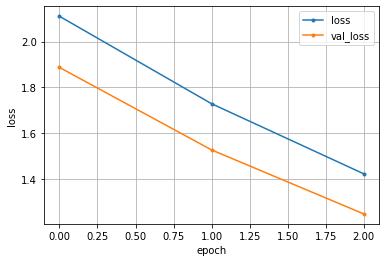

In [9]:
# loss関数の描画
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# lossのグラフ
plt.plot(range(3), loss, marker='.', label='loss')
plt.plot(range(3), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

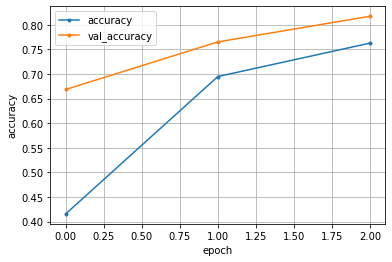

In [10]:
# 正解率の描画
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# accuracyのグラフ
plt.plot(range(3), acc, marker='.', label='accuracy')
plt.plot(range(3), val_acc, marker='.', label='val_accuracy')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
# ネットワークの可視化
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


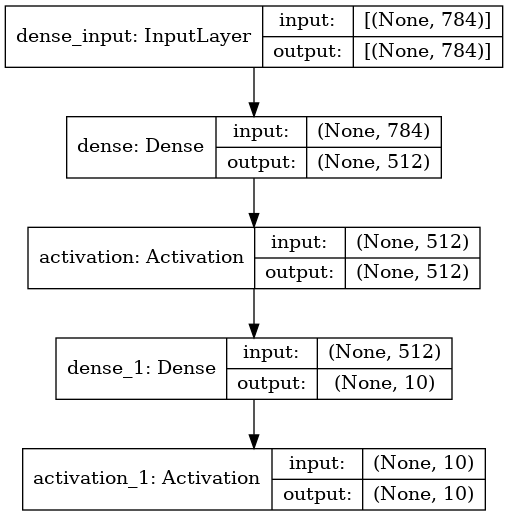

In [12]:
# より見やすいネットワークの可視化
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='./00_mnist_model.png', show_shapes=True)

ネットワークの可視化には以下のライブラリが必要
```
pip install pydot
pip install pydotplus
sudo apt-get install graphviz
```